In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipl=pd.read_csv('./ipl-matches.csv')

In [3]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [9]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int32  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [8]:
ipl['ID'] = ipl['ID'].astype('int32') #Change datatype

In [11]:
ipl.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [33]:
toss_winner = (ipl["TossWinner"] == ipl["WinningTeam"]).sum()
total_matches = ipl.shape[0]
print("Percentage of matches where Toss Winner = Match Winner:", (toss_winner/total_matches)*100)


Percentage of matches where Toss Winner = Match Winner: 51.473684210526315


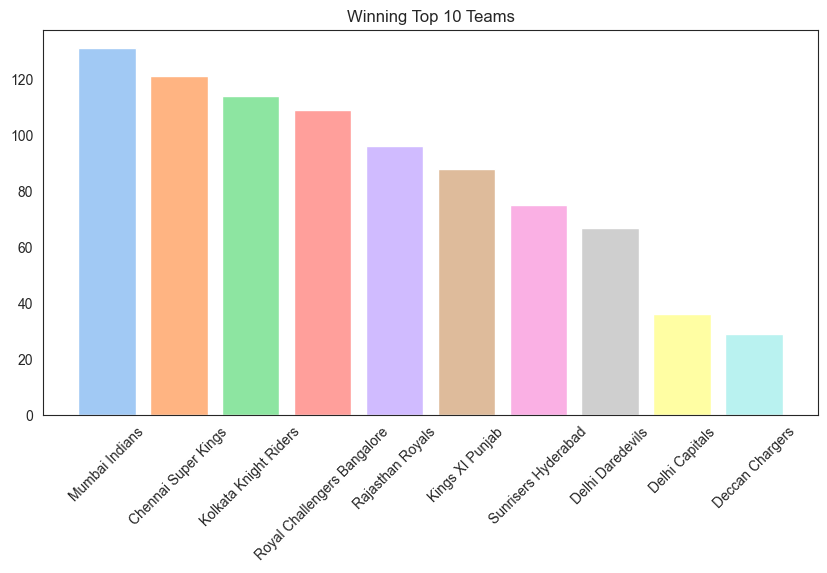

In [66]:
# Top 10 Winning Team
count_wins=ipl['WinningTeam'].value_counts().head(10)

colors=sns.color_palette('pastel')
sns.set_style(style='white')
plt.figure(figsize=(10,5))
plt.bar(count_wins.index,count_wins.values,color=colors)
plt.xticks(rotation=45)
plt.title('Winning Top 10 Teams')
plt.show()

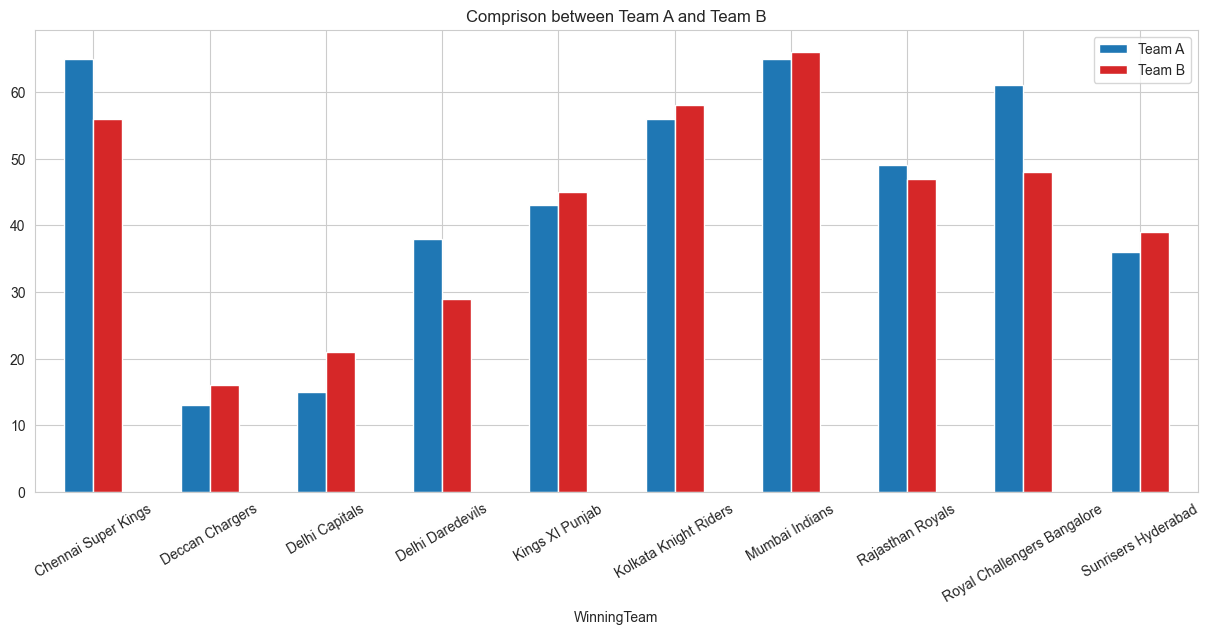

In [24]:
team1_wins = ipl.loc[ipl["WinningTeam"] == ipl["Team1"], "WinningTeam"].value_counts().head(10)
team2_wins=ipl.loc[ipl['WinningTeam']==ipl['Team2'],'WinningTeam'].value_counts().head(10)


comprison=pd.DataFrame({
    'Team A':team1_wins,
    'Team B':team2_wins
}).fillna(0)

sns.set_style(style='whitegrid')
colors=sns.color_palette(["#1f77b4", "#d62728"])
comprison.plot(kind='bar',color=colors,figsize=(15,6))
plt.title('Comprison between Team A and Team B')
plt.xticks(rotation=30)
plt.show()


                      


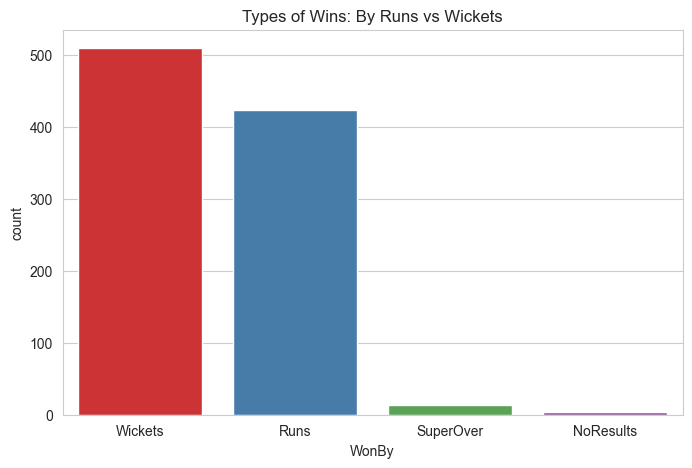

In [25]:
# Count how won by Wickets and Runs

plt.figure(figsize=(8,5))
sns.countplot(x="WonBy", data=ipl, palette="Set1",hue='WonBy')
plt.title("Types of Wins: By Runs vs Wickets")
plt.show()


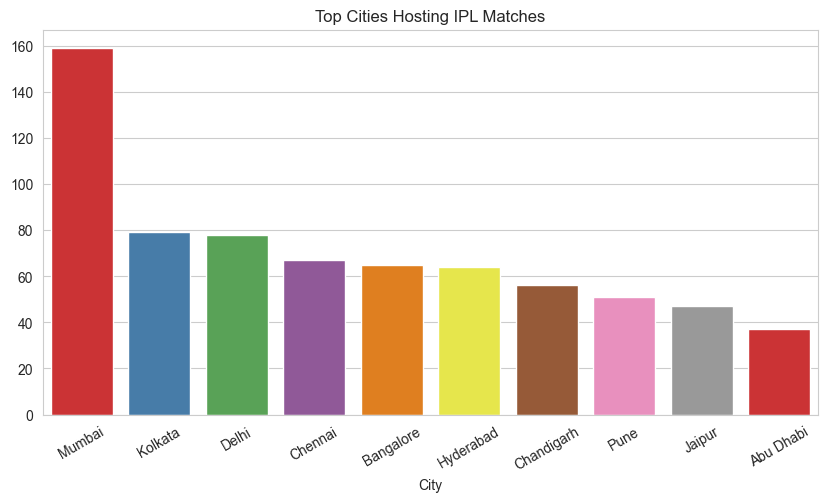

In [26]:
# Top 10 Cities
top_cities = ipl["City"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values,hue=top_cities.index,palette="Set1")
plt.title("Top Cities Hosting IPL Matches")
plt.xticks(rotation=30)
plt.show()


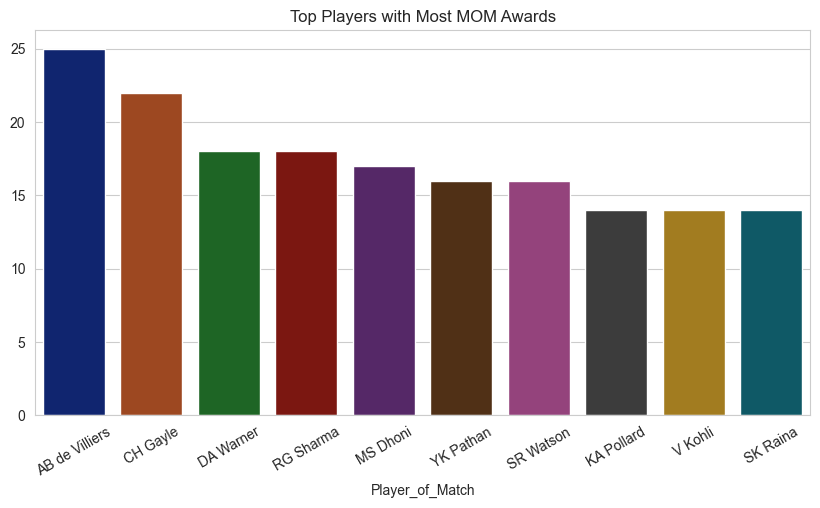

In [29]:
# Player of the match

mom = ipl["Player_of_Match"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=mom.index, y=mom.values,hue=mom.index,palette="dark")
plt.title("Top Players with Most MOM Awards")
plt.xticks(rotation=30)
plt.show()


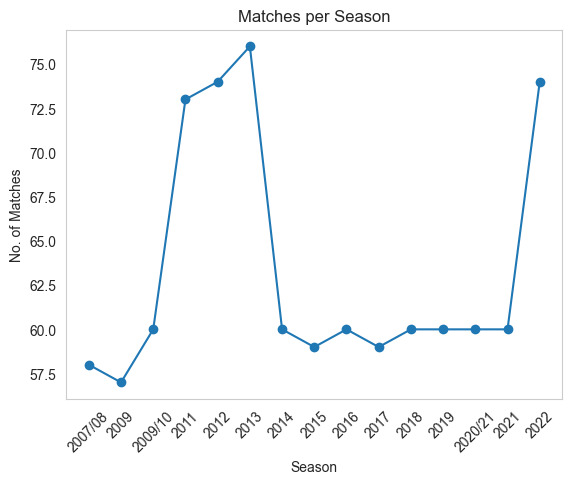

In [30]:
# Season
season_matches = ipl["Season"].value_counts().sort_index()
plt.plot(season_matches.index, season_matches.values, marker="o")
plt.title("Matches per Season")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("No. of Matches")
plt.grid()
plt.show()
